In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, \
f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# 1. Kernel Space Transformation

In [3]:
data = pd.DataFrame({"x":[1,2,2,1], "y":[1,2,1,2], "label":["r","r","b","b"] }, index = ["A","B","C","D"])
data

,x,y,label
A,1,1,r
B,2,2,r
C,2,1,b
D,1,2,b


## (a)
It's trivial that the XOR problem is not linear separable in two dimension space. As we can see from the plot below, there is no line that can split the red dots and the blue dots. No matter how we draw the line there will always be a dot that's misclassified

<IPython.core.display.Javascript object>


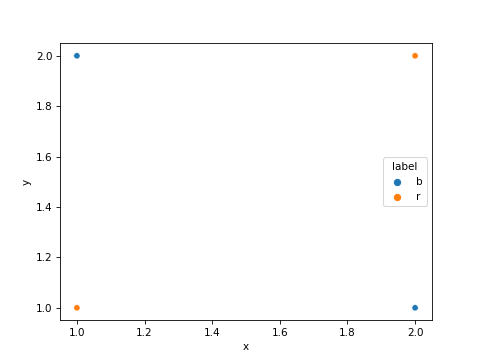

In [4]:
sns.scatterplot(data = data, x='x',y='y', hue = "label", hue_order = ['b', 'r'])

## (b)

In [5]:
data['phi_1'] = data.x/data.y
data['phi_2'] = np.abs(data.x - data.y)
data['phi_3'] = data.x + data.y
data

,x,y,label,phi_1,phi_2,phi_3
A,1,1,r,1.0,0,2
B,2,2,r,1.0,0,4
C,2,1,b,2.0,1,3
D,1,2,b,0.5,1,3


<IPython.core.display.Javascript object>


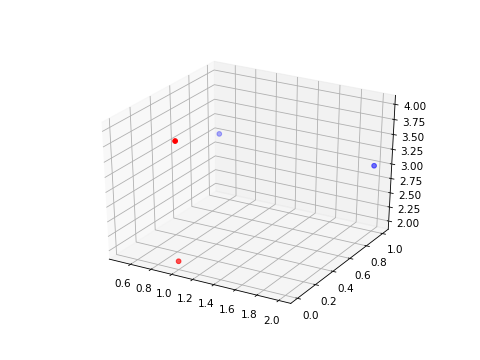

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data.phi_1, data.phi_2, data.phi_3, c = data.label)
plt.show()

#### The 3-d plot above shows A, B, C , D in 3d space after transformation

## (c)
#### The following graph shows red and blue linearly separable after transformation as the black plane (y=0.4) separate red and blue successfully.

<IPython.core.display.Javascript object>


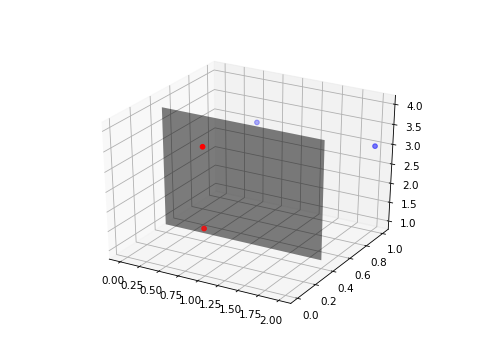

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data.phi_1, data.phi_2, data.phi_3, c = data.label)
z = np.linspace(1,4,2)
x = np.linspace(0,2,2)
X,Z = np.meshgrid(x,z)
Y = np.ones((2,2)) * 0.4
ax.plot_surface(X, Y, Z, color = "black", alpha = 0.5)
plt.show()

# 2. Naive Bayes

## (a)
Let the classes = $\{y_1,y_2,y_3\}$, features = $\{x_1,x_2,x_3,x_4\}$. For easy explaination, suppose the value of each features 1~5. Let X be an single data point.

<b> With Naive Bayes </b> 

For a class y $P(y | X) \propto P(y) \prod_{i=1}^4 P(x_i = j | y) \  where \ j = 1,2,3,4,5$

For each class we need to consider $ 4*5 + 1 = 21$ values.

There are 3 classes so we have to estimate 63 values in total

<b> Without Naive Bayes </b> 

If we didn't use the naive assumption (features are conditional independence) we will have to consider all conbination of each features's values for each class ( all the $P(y | X)$'s ), which is $5^4 * 3 = 1875$.

## (b)
#### Load and Split Data

In [8]:
cars = pd.read_csv("car_evaluation.csv")

In [9]:
cars_train, cars_test = train_test_split(
    cars, train_size = 0.8, test_size = 0.2, shuffle = True, random_state = 42)
cars_train, cars_valid = train_test_split(
    cars_train, train_size = 0.75, test_size = 0.25, shuffle = False)
len(cars_train), len(cars_valid), len(cars_test)

(1036, 346, 346)

#### Train and Evaluate Model

In [10]:
def acc(model, X, y):
    pred = model.predict(X)
    return (y == pred).mean()

In [11]:
nbclf = GaussianNB()
nbclf = nbclf.fit(cars_train.drop(columns = "label"), cars_train["label"])

In [12]:
print("Train accuracy: ", acc(nbclf, cars_train.drop(columns = "label"), cars_train["label"]))
print("Validation accuracy: ", acc(nbclf, cars_valid.drop(columns = "label"), cars_valid["label"]))
print("Test accuracy: ", acc(nbclf, cars_test.drop(columns = "label"), cars_test["label"]))


Train accuracy:  0.7895752895752896
Validation accuracy:  0.7312138728323699
Test accuracy:  0.7341040462427746


# 3. SVM

## (a)

#### Load and Split Data

In [13]:
cars = pd.read_csv("car_evaluation.csv")

In [14]:
cars_train, cars_test = train_test_split(
    cars, train_size = 0.8, test_size = 0.2, shuffle = True, random_state = 42)
cars_train, cars_valid = train_test_split(
    cars_train, train_size = 0.75, test_size = 0.25, shuffle = False)
len(cars_train), len(cars_valid), len(cars_test)

(1036, 346, 346)

#### Train and Evaluate Model

In [15]:
svmclf = SVC(C = 1)
svmclf = svmclf.fit(cars_train.drop(columns = "label"), cars_train["label"])
print("Train accuracy: ", acc(svmclf, cars_train.drop(columns = "label"), cars_train["label"]))
print("Validation accuracy: ", acc(svmclf, cars_valid.drop(columns = "label"), cars_valid["label"]))
print("Test accuracy: ", acc(svmclf, cars_test.drop(columns = "label"), cars_test["label"]))

Train accuracy:  0.9691119691119691
Validation accuracy:  0.9219653179190751
Test accuracy:  0.9450867052023122


## (b)
#### Train model with different C

In [16]:
cs = 10 ** np.linspace(-4,4,9)
train_acc, val_acc, test_acc = [],[],[]
for c in cs:
    svmclf = SVC(C = c)
    svmclf = svmclf.fit(cars_train.drop(columns = "label"), cars_train["label"])
    train_acc.append(acc(svmclf, cars_train.drop(columns = "label"), cars_train["label"]))
    val_acc.append(acc(svmclf, cars_valid.drop(columns = "label"), cars_valid["label"]))
    test_acc.append(acc(svmclf, cars_test.drop(columns = "label"), cars_test["label"]))

#### Plot Result

<IPython.core.display.Javascript object>


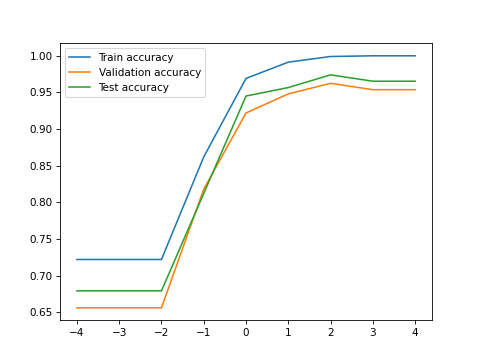

In [17]:
f, ax = plt.subplots(1, 1)
sns.lineplot(ax = ax, x = np.linspace(-4,4,9), y = train_acc, legend = True)
sns.lineplot(ax = ax, x = np.linspace(-4,4,9), y = val_acc, legend = True)
sns.lineplot(ax = ax, x = np.linspace(-4,4,9), y = test_acc, legend = True)
ax.legend(labels=["Train accuracy","Validation accuracy","Test accuracy"])
f.show()

<b>From the plot above, we can see that the model achieve the best test accuracy when C = 100.  I will select model with C = 100 as the best model. </b>
Reasoning:
When C is small, the model cares more about the minimizing ||w||^2 reather than making correct categorizations. With a small c, we trained a model that has a large margin but a low accuracy (underfit).
When we increases c, the model achieves a perfect accuracy ( 100% on the train set ) but has a thin margin. Therefore, when we test it with validation set and test set the accuracy decrease (overfit).

# 4. Decision Tree and Random Forest

## (a) Decision Tree Classifier

#### Load and Split Data

In [18]:
wine = pd.read_csv("wine.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
wine_train, wine_test = train_test_split(
    wine, train_size = 0.7, test_size = 0.3, shuffle = True, random_state = 42)
X_train = wine_train.drop(columns = "quality")
X_test = wine_test.drop(columns = "quality")
y_train = wine_train["quality"]
y_test = wine_test["quality"]

#### Train and Evaluate Model

In [20]:
dtclf = DecisionTreeClassifier()
dtclf = dtclf.fit(X_train, y_train)
pred = dtclf.predict(X_test)

<IPython.core.display.Javascript object>


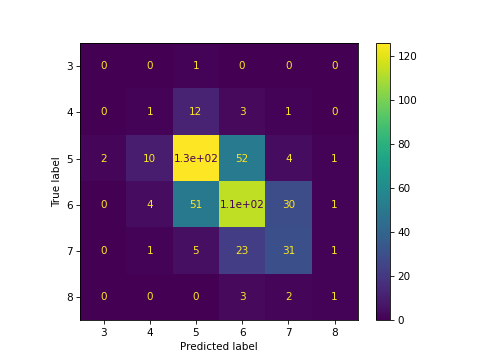

In [21]:
plot_confusion_matrix(dtclf, X_test, y_test)

<b> Calculate TP, FP, FN for each class from the confusion matrix </b>

In [22]:
conf_mat = confusion_matrix(y_test, pred)
conf_mat

array([[  0,   0,   1,   0,   0,   0],
       [  0,   1,  12,   3,   1,   0],
       [  2,  10, 126,  52,   4,   1],
       [  0,   4,  51, 114,  30,   1],
       [  0,   1,   5,  23,  31,   1],
       [  0,   0,   0,   3,   2,   1]])

In [23]:
TP = []
for i in range(len(conf_mat)):
    TP.append(conf_mat[i][i])
    
FP = []
for i in range(len(conf_mat)):
    FP.append(0)
    for j in range(len(conf_mat)):
        if i != j:
            FP[-1] += conf_mat[j][i]
        
FN = []
for i in range(len(conf_mat)):
    FN.append(0)
    for j in range(len(conf_mat)):
        if i != j:
            FN[-1] += conf_mat[i][j]

In [24]:
TP,FP,FN = np.array(TP),  np.array(FP),  np.array(FN)
TP,FP,FN 

(array([  0,   1, 126, 114,  31,   1]),
 array([ 2, 15, 69, 81, 37,  3]),
 array([ 1, 16, 69, 86, 30,  5]))

<b> Precision = TP / TP + FP </b>

<b> Recall = TP / TP + FN </b>

<b> F1 = 2 * (Precision * Recall) / (Precision + Recall) </b>

In [25]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)
f1 = np.nan_to_num(f1)
stats = pd.DataFrame({"Precision":precision,"Recall":recall, "F1":f1},index = range(3,9))
stats

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


,Precision,Recall,F1
3,0.000000,0.000000,0.000000
4,0.062500,0.058824,0.060606
5,0.646154,0.646154,0.646154
6,0.584615,0.570000,0.577215
7,0.455882,0.508197,0.480620
8,0.250000,0.166667,0.200000


## (b) Random Forest Classifier

#### Train and Evaluate Model

In [26]:
rfclf = RandomForestClassifier()
rfclf = rfclf.fit(X_train, y_train)
pred = rfclf.predict(X_test)

<IPython.core.display.Javascript object>


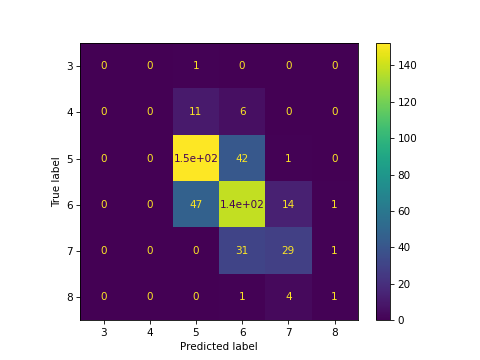

In [29]:
plot_confusion_matrix(rfclf, X_test, y_test)

In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.72      0.78      0.75       195
           6       0.63      0.69      0.66       200
           7       0.60      0.48      0.53        61
           8       0.33      0.17      0.22         6

    accuracy                           0.67       480
   macro avg       0.38      0.35      0.36       480
weighted avg       0.64      0.67      0.65       480



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Model is consist of multiple decision tree models. Each trees are generated randomly and construct to achieve high diversity. The prediction is made aggregately by all trees. Since each tree learns from different subset of the data and different splitting method, the model has higher resolution in the feature space. The model also generalized better to the testing data, as there is a sampling process when generating each trees. Therefore, random forest model is able to achieve a better preformance than decision tree model. 

## (c)

<b> Precision = TP / TP + FP </b>

<b> Recall = TP / TP + FN </b>

The model can achieve a high accuracy by always making negitive prediction. This stituation can happen as there is not enough positive samples. For such model, the accuracy will be 1000/1010 = 99%. Although the score is high, the model basically does nothing. If we use precision and recall instead, the scores will both be 0 as there is no true positive predictions. Precision and Recall works better in this case since we care more about true positive prediction as positive samples occures a lot less. It's likely that you don't want any positive model to be miss classified as they are so rare. In this case, recall rate will be an especially important evaluation matrix. 

# 5. Bias and Variance

## (a) 
Bias error measures how well your model's prediction is correct in average ( E[predictions] - target ). Variance is the model's sensitivity to the input. When we train a model, the model learns about the task and begins making better predictions. The bias error decreases but the variance increases since the model has to be sensitive to different data to make good predictions. As we keep training the data, the model will overfit to the training set, making it too sensitive to the error or fluctuation in the training data. This will cause the variance of the model to grow. In sum, bias error decreases as the training goes on while variance increases. This mechanism is called bias-variance tradeoff.


## (b) 
As the number of training sample increase, it's easier for the model to learn the actual trend instead of the errors, making it generalize to the testing data better. The variance will decrease. Although the model improves, E[prediction] will not change. Therefore, bias will not change.

## (c) 

Low K:
Think about the extreme case where k = 1. The model will have a very large variance, as it soley depends on the closes training data point. The prediction changes when the closest data point changes. The variance is high but the bias is low since it's going to give good prediction on average. 

High K:
When K = number of the training data, the model will always give the same prediction. The variance is zero because the output doesn't changes no matter how the input changes. The bias is high as it fails to capture any trend of data. It's simliar when k = 100. the mode will be insensitive to change of inputs (as it considers 100 different data points). The model will have low variance and high bias.


K = 1 -> higher variance

K = 100 -> higher bias